In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
bench = pd.read_csv('results/GEP/baseline.csv', index_col=0)
MIMO_full = pd.read_csv('results/GEP/fulldata10_LSTM.csv', index_col=0)
#MIMO = pd.read_csv('results/GEP/LSTM_MIMO10.csv', index_col=0)
condRNN = pd.read_csv('results/GEP/ConditionalRNN10_sequential.csv', index_col=0)
datasets = [condRNN, MIMO_full, bench]

In [15]:
#temp = temp.drop(temp.index[:1]).reset_index(drop=True)
#MIMO = MIMO.drop(MIMO.index[:1]).reset_index(drop=True)
MIMO_full = MIMO_full.drop(MIMO_full.index[:1]).reset_index(drop=True)
condRNN = condRNN.drop(condRNN.index[:1]).reset_index(drop=True)
datasets = [condRNN, MIMO_full, bench]

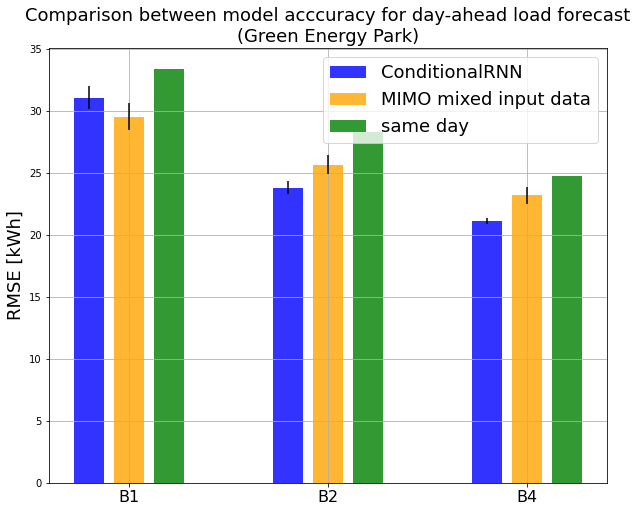

In [36]:
fig, ax = plt.subplots()
colors=["blue", "orange", "green", 'red', "black"]
labels = ['ConditionalRNN', 'MIMO mixed input data', 'same day']
x = np.array(range(1,7,2))
for i,df in enumerate(datasets):
    means = df.groupby('B')['mape'].mean()
    stds = df.groupby('B')['mape'].std()
    if i == 3:
        means.loc['GEP4']=0
        stds.loc['GEP4']=0
    #print(means)
    #print(stds)
    ax.bar(x-0.4, means, yerr=stds, alpha=0.8, width=0.3, label=labels[i], color=colors[i])
    x = x+0.4
#i = 3
#ax.bar(x-0.4, bench['rmse'], alpha=0.8, width=0.3, label=labels[i], color=colors[i])
plt.xticks(ticks=np.array(range(1,7,2)), labels=['B1','B2','B4'], fontsize=16)
plt.title('Comparison between model acccuracy for day-ahead load forecast\n(Green Energy Park)', fontsize=18)
plt.ylabel('RMSE [kWh]', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

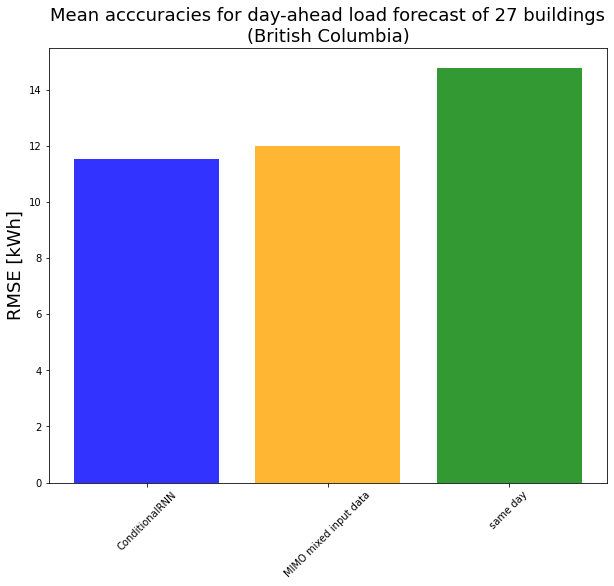

In [39]:
means = []
stds = []
datasets2 = [condRNN, MIMO_full, bench]
#means.append(35.58681558224254)
#stds.append(0)
for df in datasets2:
    #means.append(df['mape'].mean())
    #stds.append(df['mape'].std())
    means.append(df['rmse'].mean())
    stds.append(df['rmse'].mean())
    
plt.rcParams['figure.figsize'] = (10, 8)
colors=["blue", "orange", "green", "black"]
labels = ['ConditionalRNN', 'MIMO mixed input data', 'same day']
#plt.grid(zorder=0)
plt.bar(range(len(means)), means, align='center', color=colors, alpha=0.8, zorder=1)
plt.xticks(ticks=range(len(means)), labels=labels,
           rotation=45)
plt.title('Mean acccuracies for day-ahead load forecast of 27 buildings\n(British Columbia)', fontsize=18)
plt.ylabel('RMSE [kWh]', fontsize=18)
plt.show()